# Some Experiments
used for some random stuff

## Imports

In [187]:
import sys
import os
from dotenv import load_dotenv

# Füge das übergeordnete Verzeichnis zu sys.path hinzu
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, parent_dir)

load_dotenv()

True

In [188]:
from datetime import datetime
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from copy import deepcopy as dc

# own classes
from data_generation.random_transformations.jittering import create_jittered_time_series
from data_generation.random_transformations.time_warping import create_time_warped_data
from utilities import save_unscaled_sequential_data, load_sequential_time_series

In [189]:
DATA_FOLDER = Path("./data")
SYNTHETIC_DATA_FOLDER = DATA_FOLDER / "synthetic" 
REAL_DATA_FOLDER = DATA_FOLDER / "real"
LOAD_ORIGINAL_DATA = False

RED = os.getenv('RED', 'red')
BLUE = os.getenv('BLUE', 'blue')
GREEN = os.getenv('GREEN', 'green')

## Stuff

In [190]:
mitv = pd.read_csv(REAL_DATA_FOLDER / "mitv_original.csv")
mitv['date'] = pd.to_datetime(mitv['date'])

In [191]:
start_date = '2016-01-01'
end_date = '2016-12-31'

# Schneide die Daten auf den gewünschten Bereich zu
mitv = mitv.loc[(mitv['date'] >= start_date) & (mitv['date'] <= end_date)]
mitv['rain_1h'] = mitv['rain_1h'].replace(9831.30, 42)

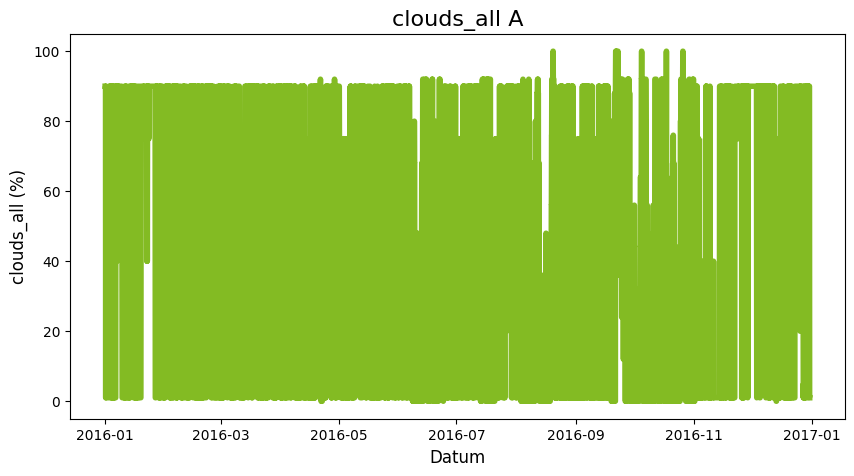

In [198]:
# Plotten der Zeitreihe
column = 'clouds_all'
plt.figure(figsize=(10, 5))
plt.plot(mitv['date'], mitv[column], linestyle='-', linewidth=4, color=GREEN, label='Verkehrsvolumen')
plt.xlabel('Datum', fontsize=12)
plt.ylabel(f'{column} (%)', fontsize=12)
plt.title(f'{column} A', fontsize=16)

plt.show()

In [67]:
aapl = pd.read_csv(REAL_DATA_FOLDER / "aapl.csv")
aapl['Date'] = pd.to_datetime(aapl['Date'])

In [68]:
start_date = '2013-04-01'
end_date = '2014-07-01'

# Schneide die Daten auf den gewünschten Bereich zu
aapl = aapl.loc[(aapl['Date'] >= start_date) & (aapl['Date'] <= end_date)]
# get close difference
aapl['diff'] = aapl['Close'].diff()


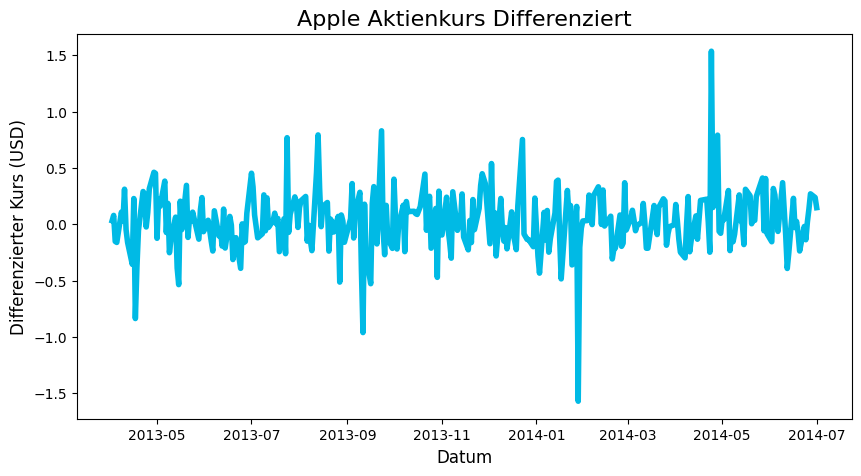

In [69]:
# Plotten der Zeitreihe
plt.figure(figsize=(10, 5))
plt.plot(aapl['Date'], aapl['diff'], linestyle='-', linewidth=4, color=BLUE, label='Original')
plt.xlabel('Datum', fontsize=12)
plt.ylabel('Differenzierter Kurs (USD)', fontsize=12)
plt.title('Apple Aktienkurs Differenziert', fontsize=16)

plt.show()

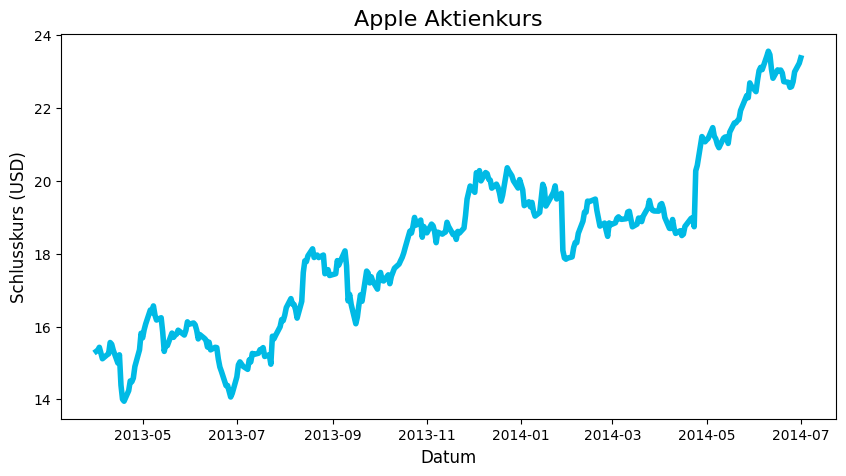

In [70]:
# Plotten der Zeitreihe
plt.figure(figsize=(10, 5))
plt.plot(aapl['Date'], aapl['Close'], linestyle='-', linewidth=4, color=BLUE, label='Original')
plt.xlabel('Datum', fontsize=12)
plt.ylabel('Schlusskurs (USD)', fontsize=12)
plt.title('Apple Aktienkurs', fontsize=16)

plt.show()

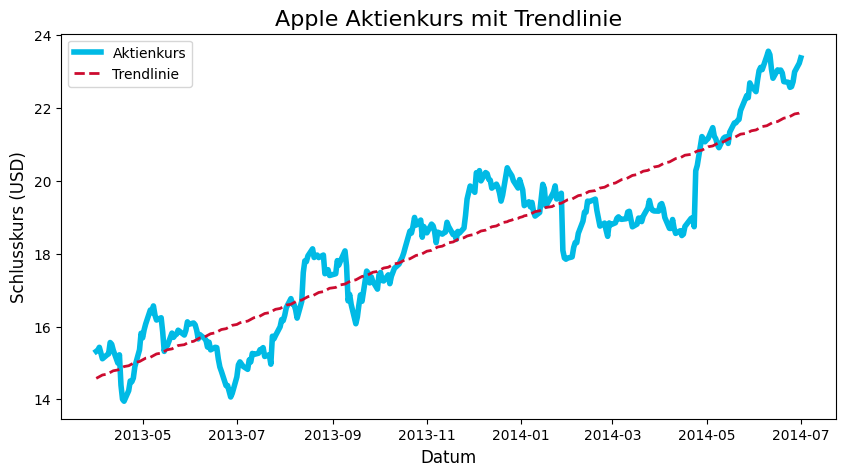

In [73]:
plt.figure(figsize=(10, 5))
plt.plot(aapl['Date'], aapl['Close'], linestyle='-', linewidth=4, color=BLUE, label='Aktienkurs')

# Berechnen der Trendlinie
x = np.arange(len(aapl['Date']))  # X-Achse (Datumsindex)
y = aapl['Close']  # Y-Achse (Schlusskurs)
z = np.polyfit(x, y, 1)  # Lineare Regression (1 für lineare Anpassung)
p = np.poly1d(z)

# Trendlinie einzeichnen
plt.plot(aapl['Date'], p(x), linestyle='--', color=RED, linewidth=2, label='Trendlinie')

# Beschriftungen und Titel
plt.xlabel('Datum', fontsize=12)
plt.ylabel('Schlusskurs (USD)', fontsize=12)
plt.title('Apple Aktienkurs mit Trendlinie', fontsize=16)
plt.legend()

# Plot anzeigen
plt.show()

In [47]:
eld = pd.read_csv(REAL_DATA_FOLDER / "eld.txt", sep=';', decimal=',', header=0)
eld['Date'] = pd.to_datetime(eld['Date'])
eld.iloc[:, 1:] = eld.iloc[:, 1:].apply(pd.to_numeric)
cutoff_date = pd.Timestamp('2012-02-01 00:15:00')
eld = eld[eld['Date'] >= cutoff_date]
eld = pd.concat([eld.iloc[:, 0:1], eld.iloc[:, -150:-100]], axis=1)

In [65]:
timeframe = 365*24*4

In [66]:
eld.head()

,Date,MT_221,MT_222,MT_223,MT_224,MT_225,MT_226,MT_227,MT_228,MT_229,...,MT_261,MT_262,MT_263,MT_264,MT_265,MT_266,MT_267,MT_268,MT_269,MT_270
38016,2012-02-01 00:15:00,76.002082,404.000000,456.000000,0.0,267.824390,325.833980,209.825998,5368.421053,794.435858,...,22.868687,109.312321,84.365285,83.748646,97.080958,193.429603,45.866365,122.377210,561.828571,48.078310
38017,2012-02-01 00:30:00,71.837585,425.333333,442.666667,0.0,172.526829,315.748642,189.355169,4368.421053,700.154560,...,24.888889,110.744986,88.251295,105.438787,94.800456,191.624549,43.035108,118.447937,573.257143,48.078310
38018,2012-02-01 00:45:00,100.989068,394.666667,461.333333,0.0,164.712195,303.335919,118.730809,2894.736842,632.148377,...,27.419192,103.581662,75.284974,92.426869,91.379704,182.599278,40.203851,108.624754,556.114286,47.557960
38019,2012-02-01 01:00:00,97.345133,465.333333,464.000000,0.0,161.785366,296.353763,109.518936,2631.578947,576.506955,...,21.858586,105.014327,86.955959,95.677140,92.519954,191.624549,42.468856,112.554028,516.057143,49.108707
38020,2012-02-01 01:15:00,85.892764,430.666667,442.666667,0.0,155.931707,318.076028,115.660184,2526.315789,561.051005,...,23.373737,116.489971,79.170984,95.677140,87.958951,188.014440,42.468856,112.554028,527.485714,47.557960


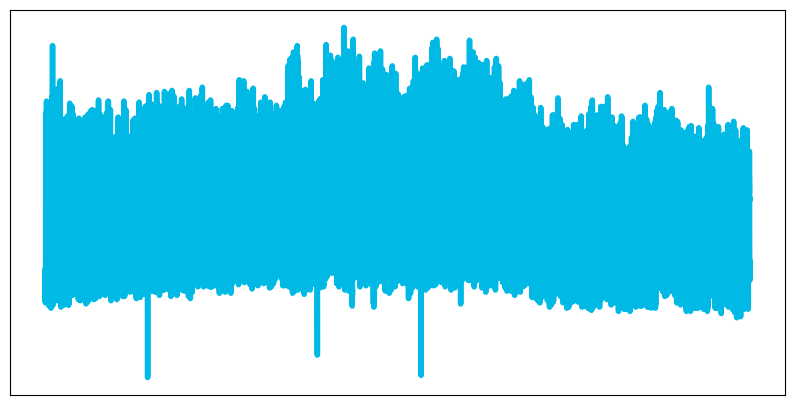

In [67]:

# Plotten der Zeitreihe
plt.figure(figsize=(10, 5))
plt.plot(eld['Date'][:timeframe], eld['MT_243'][:timeframe], linestyle='-', linewidth=4, color=BLUE, label='Original')

plt.xticks([])  
plt.yticks([]) 

plt.show()

In [ ]:
# save_unscaled_sequential_data(ori_data_path=REAL_DATA_FOLDER / "mitv_prep_1y.csv",
#                                 scaled_data_path=SYNTHETIC_DATA_FOLDER / "raw" / "1y" / "8747_12_5_timegan_lstm_16_2_20k_64_raw.csv",
#                                 scaled_data_shape=(8747, 12, 5),
#                                 no_features_to_inverse_scale=5)